## Import dependencies

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import *

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 1_000
RANDOM_AVERAGE_COUNT = 20

terms = []
stepsLO = []
stepsRI = []
stepsRand = []

# 5 threads should be enough for generating 1000 terms
gen_treads = [
    GenTermsThread(
        count_terms=-1,
        down_vertices_limit=DOWNLIMIT,
        up_vertices_limit=UPLIMIT,
        random_average_count=RANDOM_AVERAGE_COUNT,
        thread_name=i,
    )
    for i in range(5)
]
for gen_tread in gen_treads:
    gen_tread.set_mode(mode="all")
    gen_tread.start()

for gen_tread in gen_treads:
    if gen_tread.is_alive():
        gen_tread.join()

for gen_tread in gen_treads:
    terms += gen_tread.get_terms()
    stepsLO += gen_tread.get_stepsLO()
    stepsRI += gen_tread.get_stepsRI()
    stepsRand += gen_tread.get_stepsRand()

Running thread: 0
LO strategy applying
Running thread: 1
LO strategy applying
Running thread: 2
LO strategy applying
Running thread: 3
LO strategy applying
Running thread: 4
LO strategy applying
Remove unormalized terms
Left -1 normalizeble terms
Thread 4 is generated and filtered terms
Thread 4 is doing RI norm


100%|██████████| 210/210 [05:50<00:00,  1.67s/it]


Thread 4 is DONE RI norm
Thread 4 is doing Random norm


 51%|█████▏    | 108/210 [02:11<00:51,  1.96it/s]

Remove unormalized terms
Left -1 normalizeble terms
Thread 1 is generated and filtered terms
Thread 1 is doing RI norm


 82%|████████▏ | 142/173 [02:11<00:50,  1.62s/it]

Remove unormalized terms
Left -1 normalizeble terms
Thread 0 is generated and filtered terms
Thread 0 is doing RI norm


 90%|█████████ | 190/210 [04:33<00:27,  1.36s/it]

 91%|█████████ | 191/210 [04:34<00:26,  1.40s/it]

 96%|█████████▌| 202/210 [04:51<00:11,  1.47s/it]

100%|██████████| 210/210 [05:09<00:00,  1.48s/it]

 97%|█████████▋| 167/173 [02:51<00:10,  1.70s/it]

Thread 4 is DONE Random norm
Thread 4 is DONE



 99%|█████████▉| 171/173 [02:56<00:02,  1.29s/it]

Remove unormalized terms
Left -1 normalizeble terms
Thread 2 is generated and filtered terms
Thread 2 is doing RI norm



 38%|███▊      | 70/186 [00:00<00:01, 100.81it/s]

Thread 1 is DONE RI norm
Thread 1 is doing Random norm



 74%|███████▎  | 137/186 [01:16<00:45,  1.08it/s][A

 32%|███▏      | 55/173 [01:15<01:46,  1.11it/s]

 32%|███▏      | 56/173 [01:17<02:02,  1.04s/it]

 33%|███▎      | 57/173 [01:18<02:12,  1.15s/it]

 34%|███▎      | 58/173 [01:20<02:24,  1.26s/it]

 34%|███▍      | 59/173 [01:21<02:39,  1.40s/it]

 35%|███▍      | 60/173 [01:22<02:27,  1.30s/it]

 35%|███▌      | 61/173 [01:24<02:30,  1.35s/it]

 36%|███▌      | 62/173 [01:25<02:24,  1.31s/it]

 36%|███▋      | 63/173 [01:26<02:21,  1.29s/it]

 37%|███▋      | 64/173 [01:27<02:21,  1.29s/it]

 38%|███▊      | 65/173 [01:28<02:04,  1.16s/it]

 38%|███▊      | 66/173 [01:29<02:02,  1.14s/it]

 39%|███▊      | 67/173 [01:30<02:01,  1.14s/it]

 39%|███▉      | 68/173 [01:31<01:54,  1.09s/it]

 40%|███▉      | 69/173 [01:32<01:51,  1.08s/it]

 40%|████      | 70/173 [01:34<01:53,  1.10s/it]

 41%|████      | 71/173 [01:35<01:51,  1.09s/it]

 42%|████▏     | 72/173 [01:36<01:52,  1.11s/it]

 42%|████▏     | 73/173 [01:37<01:45,  1.05s/i

Thread 1 is DONE Random norm
Thread 1 is DONE




 96%|█████████▌| 202/211 [04:35<00:09,  1.07s/it]

 96%|█████████▌| 203/211 [04:36<00:07,  1.04it/s]

 97%|█████████▋| 204/211 [04:36<00:06,  1.16it/s]

 97%|█████████▋| 205/211 [04:37<00:04,  1.28it/s]

 98%|█████████▊| 206/211 [04:38<00:03,  1.37it/s]

 98%|█████████▊| 207/211 [04:38<00:02,  1.46it/s]

 99%|█████████▊| 208/211 [04:39<00:01,  1.51it/s]

 99%|█████████▉| 209/211 [04:39<00:01,  1.56it/s]

100%|█████████▉| 210/211 [04:40<00:00,  1.62it/s]

100%|██████████| 211/211 [04:41<00:00,  1.33s/it]


Thread 0 is DONE RI norm
Thread 0 is doing Random norm



 18%|█▊        | 37/211 [00:41<02:12,  1.32it/s]

Remove unormalized terms
Left -1 normalizeble terms
Thread 3 is generated and filtered terms
Thread 3 is doing RI norm



 18%|█▊        | 38/211 [00:43<02:41,  1.07it/s]

 18%|█▊        | 39/211 [00:44<02:23,  1.19it/s]

 19%|█▉        | 40/211 [00:45<02:26,  1.17it/s]

 19%|█▉        | 41/211 [00:45<02:26,  1.16it/s]

 20%|█▉        | 42/211 [00:46<02:24,  1.17it/s]

 20%|██        | 43/211 [00:47<02:29,  1.12it/s]

 28%|██▊       | 60/211 [00:59<01:51,  1.36it/s]

 29%|██▉       | 61/211 [01:00<01:42,  1.46it/s]

 29%|██▉       | 62/211 [01:01<01:43,  1.45it/s]

 30%|██▉       | 63/211 [01:02<01:58,  1.25it/s]

 30%|███       | 64/211 [01:03<01:59,  1.23it/s]

 31%|███       | 65/211 [01:04<01:59,  1.22it/s]

 31%|███▏      | 66/211 [01:05<02:05,  1.16it/s]

 32%|███▏      | 67/211 [01:06<02:05,  1.14it/s]

 32%|███▏      | 68/211 [01:06<02:09,  1.10it/s]

 33%|███▎      | 69/211 [01:08<02:11,  1.08it/s]

 33%|███▎      | 70/211 [01:08<02:18,  1.02it/s]

 21%|██        | 46/217 [00:25<02:48,  1.02it/s]

 34%|███▎      | 71/211 [01:10<02:54,  1.25s/it]

 37%|███▋      | 78/211 [01:16<01:41,  1.31it/s]


Thread 2 is DONE RI norm
Thread 2 is doing Random norm



 23%|██▎       | 43/186 [00:26<00:42,  3.36it/s]

Thread 0 is DONE Random norm
Thread 0 is DONE


100%|██████████| 186/186 [01:14<00:00,  2.50it/s]


Thread 2 is DONE Random norm
Thread 2 is DONE




100%|██████████| 217/217 [05:11<00:00,  1.43s/it]


Thread 3 is DONE RI norm
Thread 3 is doing Random norm


100%|██████████| 217/217 [09:33<00:00,  2.64s/it]

Thread 3 is DONE Random norm
Thread 3 is DONE


In [3]:
print(f"\n\ngenerated & filtered terms: {len(terms)}")

terms = terms[:LAMBDA_TERM_COUNT]
stepsLO = stepsLO[:LAMBDA_TERM_COUNT]
stepsRI = stepsRI[:LAMBDA_TERM_COUNT]
stepsRand = stepsRand[:LAMBDA_TERM_COUNT]

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

print(f"number of terms with normal form {len(terms)}")
print("number of steps to normalize using LO strategy= {}".format(stepsLO))

print("number of steps to normalize using RI strategy= {}".format(stepsRI))
print("number of steps to normalize using Random strategy= {}".format(stepsRand))



generated & filtered terms: 997
number of lambda terms 997
number of vertices= [59, 57, 54, 58, 56, 58, 56, 58, 56, 52, 55, 58, 52, 54, 59, 52, 57, 54, 57, 52, 51, 54, 56, 56, 51, 58, 55, 58, 57, 56, 59, 51, 54, 53, 59, 56, 55, 52, 55, 51, 53, 55, 53, 58, 52, 56, 55, 55, 51, 58, 57, 57, 57, 58, 59, 54, 58, 55, 57, 59, 54, 56, 55, 55, 51, 53, 51, 52, 51, 55, 56, 51, 58, 58, 53, 53, 57, 53, 57, 58, 53, 58, 54, 59, 55, 58, 51, 59, 58, 56, 55, 59, 54, 53, 55, 52, 52, 52, 59, 56, 56, 59, 58, 52, 55, 57, 58, 54, 53, 57, 52, 56, 52, 54, 55, 51, 57, 51, 54, 54, 51, 59, 59, 52, 56, 59, 51, 59, 52, 52, 58, 57, 53, 59, 54, 59, 51, 57, 52, 51, 51, 51, 57, 53, 59, 59, 55, 57, 59, 56, 59, 53, 54, 53, 58, 51, 51, 55, 55, 58, 52, 58, 57, 58, 51, 53, 53, 52, 57, 52, 52, 57, 56, 55, 54, 51, 52, 57, 58, 58, 55, 57, 54, 53, 51, 52, 57, 53, 51, 51, 52, 51, 59, 57, 55, 56, 51, 56, 59, 55, 55, 52, 59, 52, 56, 58, 52, 54, 53, 59, 54, 59, 52, 56, 51, 54, 59, 59, 58, 59, 51, 51, 51, 53, 58, 52, 53, 54, 57, 57

In [4]:
print("max cound LO: {}".format(max(stepsLO)))
print("max cound RI: {}".format(max(stepsRI)))
print("max cound Rand: {}".format(max(stepsRand)))

max cound LO: 139
max cound RI: inf
max cound Rand: inf


In [5]:
max_count_steps_rlenv = 150
strategies_env = [LeftmostOutermostStrategy(), RightmostInnermostStrategy()]

explore_actions = 100
epsilon = 0.1

In [7]:
lambda_env = LambdaEnv(
    strategies=strategies_env,
    lambda_terms=terms,
    max_step_term=max_count_steps_rlenv,
    count_terms=len(terms),
)

In [8]:
lambda_env, rewards_e_greedy = run_e_greedy_policy(
    lambda_env,
    exploration=explore_actions,
    max_term_reward=max_count_steps_rlenv,
    epsilon=epsilon,
    deterministic=True,
    is_action_based=True,
)

In [9]:
lambda_env.reset_soft()
lambda_env, rewards_e_greedy_non_d = run_e_greedy_policy(
    lambda_env,
    exploration=explore_actions,
    max_term_reward=max_count_steps_rlenv,
    epsilon=epsilon,
    deterministic=False,
    is_action_based=True,
)

In [10]:
steps_e_greedy = [max_count_steps_rlenv - (rew + 1) for rew in rewards_e_greedy]
steps_e_greedy_non_d = [
    max_count_steps_rlenv - (rew + 1) for rew in rewards_e_greedy_non_d
]

In [11]:
print("count steps to norm by e-Greedy policy = {}".format(steps_e_greedy))
print(
    "count steps to norm by e-Greedy policy non det = {}".format(steps_e_greedy_non_d)
)

count steps to norm by e-Greedy policy = [4, 12, 7, 3, 2, 7, 45, 54, 5, 5, 15, 5, 6, 5, 15, 7, 6, 10, 7, 8, 6, 3, 9, 10, 0, 9, 31, 7, 2, 4, 20, 7, 6, 16, 5, 8, 11, 16, 20, 6, 4, 5, 3, 5, 1, 4, 4, 32, 2, 1, 6, 16, 6, 3, 7, 9, 20, 4, 5, 9, 5, 3, 7, 8, 8, 3, 6, 6, 5, 11, 68, 16, 6, 12, 10, 8, 11, 12, 12, 4, 6, 6, 15, 11, 17, 11, 15, 15, 1, 3, 6, 14, 11, 2, 21, 8, 12, 13, 13, 6, 20, 26, 3, 12, 14, 4, 11, 6, 4, 62, 4, 6, 10, 7, 5, 7, 6, 3, 13, 18, 8, 15, 5, 12, 2, 4, 6, 2, 13, 2, 9, 45, 9, 16, 4, 3, 4, 11, 7, 2, 9, 3, 16, 2, 27, 10, 4, 6, 70, 6, 4, 8, 7, 8, 2, 3, 9, 14, 15, 12, 7, 13, 18, 2, 4, 6, 10, 9, 26, 3, 3, 3, 5, 6, 4, 3, 5, 19, 4, 9, 23, 13, 9, 7, 5, 6, 8, 18, 5, 3, 14, 3, 8, 17, 3, 25, 9, 7, 7, 7, 5, 5, 9, 1, 20, 11, 14, 10, 3, 11, 5, 13, 10, 5, 11, 16, 32, 7, 13, 17, 3, 20, 3, 19, 7, 17, 26, 6, 12, 4, 23, 6, 14, 24, 5, 7, 13, 9, 14, 1, 12, 6, 12, 4, 8, 10, 5, 12, 7, 8, 8, 8, 6, 4, 12, 6, 1, 25, 5, 3, 6, 6, 4, 7, 11, 4, 6, 2, 4, 16, 2, 17, 14, 8, 9, 4, 12, 0, 10, 1, 11, 8, 14, 9, 1

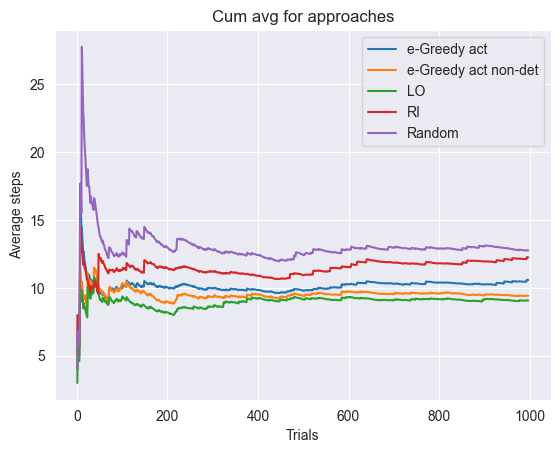

In [13]:
comp_data = {
    "e-Greedy act": (steps_e_greedy, "-"),
    "e-Greedy act non-det": (steps_e_greedy_non_d, "-"),
    "LO": (stepsLO, "-"),
    "RI": ([step if step != np.inf else 150 for step in stepsRI], "-"),
    "Random": ([step if step != np.inf else 150 for step in stepsRand], "-"),
}

draw_cumulative_avg_comparison(comp_data)

In [14]:
from scipy.stats import iqr


def get_outliers(x, axis=0, bar=1.5):
    d_iqr = iqr(x, axis=axis)
    d_q3 = np.percentile(x, 95, axis=axis)
    iqr_distance = np.multiply(d_iqr, bar)

    stat_shape = list(x.shape)
    stat_shape[axis] = 1

    upper_range = d_q3 + iqr_distance
    upper_outlier = np.greater(x - upper_range.reshape(stat_shape), 0)

    return [False if res else True for res in upper_outlier]


def clear_arr(arr):
    return np.array(arr)[get_outliers(np.array(arr))]

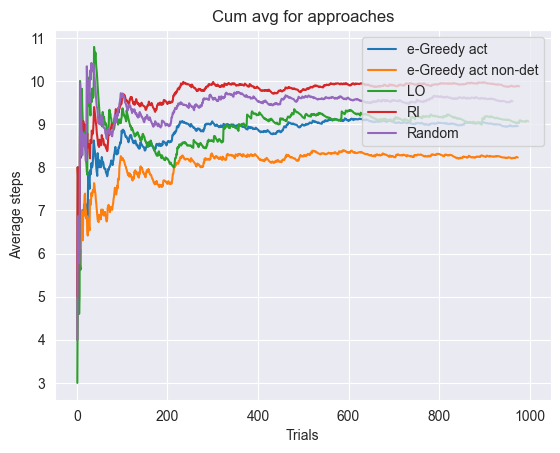

In [15]:
comp_data = {
    "e-Greedy act": (clear_arr(steps_e_greedy), "-"),
    "e-Greedy act non-det": (clear_arr(steps_e_greedy_non_d), "-"),
    "LO": (stepsLO, "-"),
    "RI": (clear_arr(stepsRI), "-"),
    "Random": (clear_arr(stepsRand), "-"),
}

draw_cumulative_avg_comparison(comp_data)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 18.47it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.344416   880.005348 -7720.040888     inf      0.062084   
lognorm          0.345442   882.055153 -7717.145026     inf      0.056489   
exponpow         0.354726   875.211876 -7691.314402     inf      0.133350   
rayleigh         0.355766   969.925575 -7695.342940     inf      0.134240   
norm             0.367203  1031.358981 -7664.523804     inf      0.140620   

             ks_pvalue  
gamma     1.047525e-03  
lognorm   3.834790e-03  
exponpow  1.451672e-15  
rayleigh  9.087278e-16  
norm      2.889440e-17  
{'gamma': {'a': 1.8370255955252426, 'loc': 0.5252481772404627, 'scale': 4.589826514972209}}
Norm distribution: (8.956878850102669, 6.073826173486807)


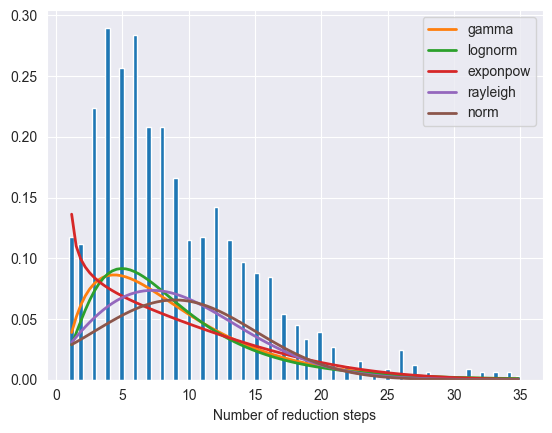

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 19.90it/s]

Log Norm distribution params: (1.9517792026348668, 0.7393632566292757); expected value = 9.254484226152751


In [19]:
draw_hist([step if step != 0 else 1 for step in clear_arr(steps_e_greedy)])

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 18.56it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
exponpow         0.264244   930.700801 -7978.129424     inf      0.190041   
powerlaw         0.272492   807.419009 -7948.193119     inf      0.198291   
lognorm          0.274758   927.041404 -7940.124727     inf      0.074157   
gamma            0.293674   994.157879 -7875.276772     inf      0.263695   
rayleigh         0.305683  1039.284085 -7843.124401     inf      0.192037   

             ks_pvalue  
exponpow  2.808643e-31  
powerlaw  4.891311e-34  
lognorm   4.192146e-05  
gamma     2.922140e-60  
rayleigh  6.194475e-32  
{'exponpow': {'b': 0.5409705472292536, 'loc': 0.9999999999999999, 'scale': 12.187966401800598}}
Norm distribution: (8.263860369609857, 7.214034055663542)


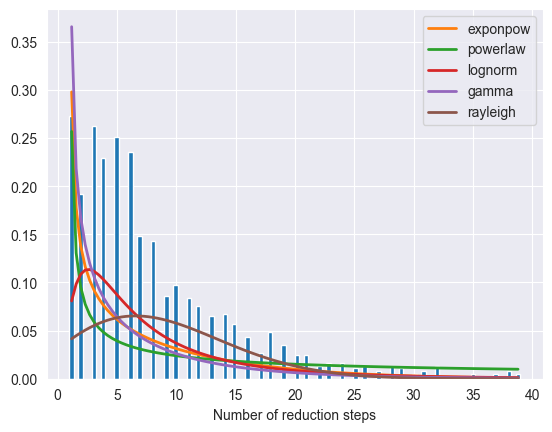

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 17.13it/s]

Log Norm distribution params: (1.7406807669662054, 0.9081851747450648); expected value = 8.61134846895207


In [20]:
draw_hist([step if step != 0 else 1 for step in clear_arr(steps_e_greedy_non_d)])

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 17.92it/s]


number of not normalized terms: 0
          sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm          0.006122  1607.563018 -11943.943918     inf      0.082297   
chi2             0.008680  2161.295311 -11595.803159     inf      0.145075   
exponpow         0.020195  1160.690106 -10753.944485     inf      0.347616   
powerlaw         0.024728  1134.045280 -10552.044743     inf      0.302747   
rayleigh         0.024793  4113.747616 -10556.337334     inf      0.271089   

              ks_pvalue  
lognorm    2.538045e-06  
chi2       8.923534e-19  
exponpow  3.720711e-108  
powerlaw   1.432849e-81  
rayleigh   3.258169e-65  
{'lognorm': {'s': 0.9832551967550747, 'loc': 0.3367674296257313, 'scale': 5.320828867390237}}
Norm distribution: (9.0641925777332, 11.908877182264154)


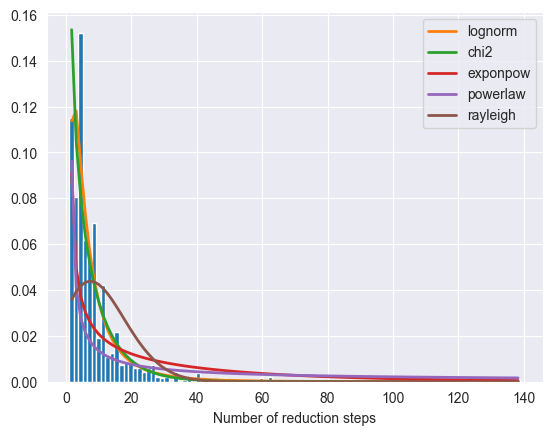

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 21.27it/s]

Log Norm distribution params: (1.7643700634291315, 0.9000875035422734); expected value = 8.7534579837802


In [21]:
draw_hist(stepsLO)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 18.78it/s]


number of not normalized terms: 15
          sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm          0.005593  1665.244686 -11837.853492     inf      0.061125   
chi2             0.006846  2091.806991 -11639.329321     inf      0.069721   
rayleigh         0.012321  3934.049616 -11069.125426     inf      0.145945   
norm             0.017584  5011.845766 -10719.826034     inf      0.139288   
exponpow         0.026167  2886.130859 -10322.592833     inf      0.187510   

             ks_pvalue  
lognorm   1.243223e-03  
chi2      1.352091e-04  
rayleigh  1.017809e-18  
norm      4.404873e-17  
exponpow  1.057629e-30  
{'lognorm': {'s': 0.5411533829714406, 'loc': -0.7036872075484157, 'scale': 9.346570110262203}}
Norm distribution: (10.135437881873727, 6.7302541208541085)


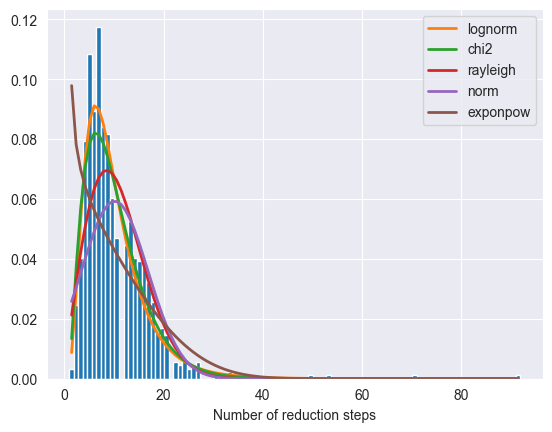

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 17.17it/s]

Log Norm distribution params: (2.1421325147532886, 0.5954378467195222); expected value = 10.169627981551274


In [22]:
draw_hist(stepsRI)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 16.46it/s]


number of not normalized terms: 15
          sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm          0.000916  1874.303300 -13614.332914     inf      0.047955   
rayleigh         0.011394  6577.784319 -11145.924997     inf      0.219817   
exponpow         0.012990  2685.013676 -11010.326790     inf      0.199387   
norm             0.014725  7555.961595 -10894.056068     inf      0.211699   
powerlaw         0.020977  1145.965201 -10539.690317     inf      0.405744   

              ks_pvalue  
lognorm    2.113650e-02  
rayleigh   3.778369e-42  
exponpow   1.084095e-34  
norm       4.276777e-39  
powerlaw  1.394066e-146  
{'lognorm': {'s': 0.8166269374200752, 'loc': 0.6489219580822725, 'scale': 7.008110375769922}}
Norm distribution: (10.65234215885947, 11.247364009489056)


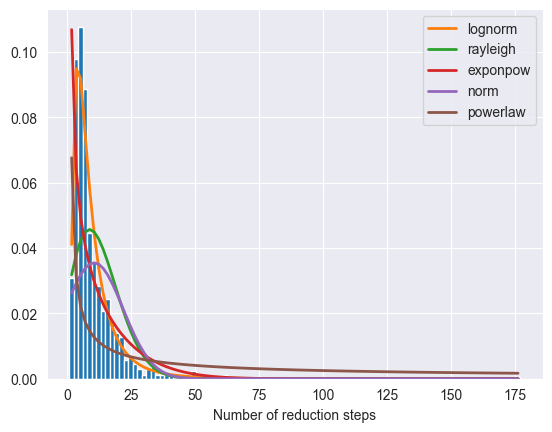

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 21.97it/s]

Log Norm distribution params: (2.0626024409720607, 0.7347586430256116); expected value = 10.304055676376821


In [23]:
draw_hist(stepsRand)